# AI_MHW_images Round 2

In [97]:
# imports
from importlib import reload
import os
import numpy as np
import datetime
from matplotlib import pyplot as plt

import matplotlib as mpl

mpl.rcParams['font.family'] = 'stixgeneral'

import matplotlib.gridspec as gridspec
from matplotlib import image as mpimg
from matplotlib.patches import Ellipse


#from cf_units import Unit

import pandas
import xarray as xr
import xesmf as xe


#from mhw_analysis.ai import ai_mhw_images
from mhw_analysis.ncep import io as ncep_io

# Init

In [2]:
# coords
lat = -89.875 + np.arange(720)*0.25
lon = 0.125 + np.arange(1440)*0.25

In [3]:
xydim = 64

## Load NCEP (for speed-up)

In [5]:
# File
ncep_path = os.getenv("NCEP_DOE")

ifile = os.path.join(ncep_path, 'NCEP-DOE_Z500.nc')

# Load cube
ncep_xr = xr.load_dataset(ifile)
# Expose
#_ = ncep_cube.data[:]

In [6]:
ncep_xr

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 15157)
Coordinates:
  * time     (time) datetime64[ns] 1978-12-31 1979-01-01 ... 2020-06-29
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    Z500     (time, lat, lon) float32 5097.0 5097.0 5097.0 ... 5125.0 5125.0
Attributes:
    Conventions:  CF-1.7

In [7]:
ncep_xr['lon'].values

array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
        22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,
        45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,
        67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,
        90. ,  92.5,  95. ,  97.5, 100. , 102.5, 105. , 107.5, 110. ,
       112.5, 115. , 117.5, 120. , 122.5, 125. , 127.5, 130. , 132.5,
       135. , 137.5, 140. , 142.5, 145. , 147.5, 150. , 152.5, 155. ,
       157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5, 175. , 177.5,
       180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5, 200. ,
       202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. ,
       247.5, 250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5,
       270. , 272.5, 275. , 277.5, 280. , 282.5, 285. , 287.5, 290. ,
       292.5, 295. , 297.5, 300. , 302.5, 305. , 307.5, 310. , 312.5,
       315. , 317.5,

# Run on Intermediate MHW Systems

## Load intermediate table

In [9]:
path = '/home/xavier/Projects/Oceanography/AI/MHWS'

In [11]:
mhw_systems = pandas.read_hdf(os.path.join(path, 'MHW_sys_intermediate.hdf'))

In [12]:
mhw_systems.head()

,NSpax,category,mask_Id,max_area,xcen,xboxmin,xboxmax,ycen,yboxmin,yboxmax,zcen,zboxmin,zboxmax,date,lat,lon,max_time,null_time
Id,,,,,,,,,,,,,,,,,,
4768,238157,1,24434,2530,146.690933,64,230,716.595215,621,827,6875.685059,6656,7068,2000-10-28,-53.202267,179.273804,730521,729790
6943,48894,1,35546,1700,100.062790,70,130,729.652039,649,809,3124.972656,3056,3211,1990-07-22,-64.859303,182.538010,726660,727025
7526,151730,4,38982,4832,100.569588,71,141,1425.960693,0,1439,4660.063965,4600,4747,1994-10-05,-64.732603,356.615173,728189,728554
8828,72612,4,46816,2046,107.257065,76,154,303.012939,230,387,8077.781738,7980,8132,2004-02-12,-63.060734,75.878235,731627,732723
9588,125047,2,50773,2424,103.733215,77,156,1380.768066,0,1439,13601.375977,13551,13668,2019-03-29,-63.941696,345.317017,737140,735679


## Grab Z500

In [13]:
# Example near lon=0
idx = np.argmin(mhw_systems.lon)
mhw_systems.iloc[idx]

NSpax             48456
category              2
mask_Id          729524
max_area           1284
xcen            237.687
xboxmin             202
xboxmax             284
ycen          0.0939331
yboxmin               0
yboxmax            1439
zcen            1527.32
zboxmin            1489
zboxmax            1606
date         1986-03-08
lat            -30.4532
lon            0.148483
max_time         725061
null_time        724696
Name: 202585, dtype: object

In [14]:
idx2 = np.argmin(np.abs(mhw_systems.lon-180.))
mhw_sys2 = mhw_systems.iloc[idx2]
mhw_sys2

NSpax             26828
category              3
mask_Id         1201274
max_area           2515
xcen            350.858
xboxmin             318
xboxmax             378
ycen             719.55
yboxmin             672
yboxmax             759
zcen            1731.52
zboxmin            1720
zboxmax            1744
date         1986-09-28
lat            -2.16048
lon             180.013
max_time         725275
null_time        724545
Name: 323617, dtype: object

### xr -- Without climate subtraction

In [17]:
mhw_sys2.date

datetime.date(1986, 9, 28)

In [18]:
ncep_xr

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 15157)
Coordinates:
  * time     (time) datetime64[ns] 1978-12-31 1979-01-01 ... 2020-06-29
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    Z500     (time, lat, lon) float32 5097.0 5097.0 5097.0 ... 5125.0 5125.0
Attributes:
    Conventions:  CF-1.7

In [56]:
idate = datetime.datetime.fromordinal(mhw_sys2.date.toordinal())
ds = ncep_xr.sel(time=idate)

In [20]:
ds_out = xr.Dataset({'lat': (['lat'], lat[ii-xydim//2:ii+xydim//2]),
                     'lon': (['lon'], lon[jj-xydim//2:jj+xydim//2]),
                    }
                   )

In [21]:
ds_out

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 64)
Coordinates:
  * lat      (lat) float64 -10.12 -9.875 -9.625 -9.375 ... 5.125 5.375 5.625
  * lon      (lon) float64 172.1 172.4 172.6 172.9 ... 187.1 187.4 187.6 187.9
Data variables:
    *empty*

### Regridder

In [22]:
regridder = xe.Regridder(ds, ds_out, 'bilinear')
regridder 

Create weight file: bilinear_73x144_64x64.nc


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_73x144_64x64.nc 
Reuse pre-computed weights? False 
Input grid shape:           (73, 144) 
Output grid shape:          (64, 64) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [35]:
dr_out = regridder(ds['Z500'])

In [36]:
dr_out

<xarray.DataArray 'Z500' (lat: 64, lon: 64)>
array([[5864.61860605, 5864.60631144, 5864.64635547, ..., 5860.80333512,
        5860.79835035, 5860.89493688],
       [5865.0429097 , 5865.0476786 , 5865.1027124 , ..., 5861.10020229,
        5861.1027124 , 5861.20808599],
       [5865.12790962, 5865.14268719, 5865.20772475, ..., 5861.20021275,
        5861.20772475, 5861.32309255],
       ...,
       [5853.36432303, 5853.85476832, 5854.39742733, ..., 5866.15226075,
        5865.94970973, 5865.54918474],
       [5853.59433527, 5854.06479271, 5854.5924461 , ..., 5866.45729359,
        5866.2497407 , 5865.84919331],
       [5853.82431688, 5854.27478912, 5854.7874389 , ..., 5866.76228579,
        5866.5497317 , 5866.14916194]])
Coordinates:
    time     datetime64[ns] 1986-09-28
  * lon      (lon) float64 172.1 172.4 172.6 172.9 ... 187.1 187.4 187.6 187.9
  * lat      (lat) float64 -10.12 -9.875 -9.625 -9.375 ... 5.125 5.375 5.625
Attributes:
    regrid_method:  bilinear

### xarray interoplate

In [59]:
xr_out = ds.interp(lat=lat[ii-xydim//2:ii+xydim//2], lon=lon[jj-xydim//2:jj+xydim//2])

In [60]:
xr_out

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 64)
Coordinates:
    time     datetime64[ns] 1986-09-28
  * lat      (lat) float64 -10.12 -9.875 -9.625 -9.375 ... 5.125 5.375 5.625
  * lon      (lon) float64 172.1 172.4 172.6 172.9 ... 187.1 187.4 187.6 187.9
Data variables:
    Z500     (lat, lon) float64 5.865e+03 5.865e+03 ... 5.867e+03 5.866e+03
Attributes:
    Conventions:  CF-1.7

### Plot

In [41]:
dr_out.values

array([[5864.61860605, 5864.60631144, 5864.64635547, ..., 5860.80333512,
        5860.79835035, 5860.89493688],
       [5865.0429097 , 5865.0476786 , 5865.1027124 , ..., 5861.10020229,
        5861.1027124 , 5861.20808599],
       [5865.12790962, 5865.14268719, 5865.20772475, ..., 5861.20021275,
        5861.20772475, 5861.32309255],
       ...,
       [5853.36432303, 5853.85476832, 5854.39742733, ..., 5866.15226075,
        5865.94970973, 5865.54918474],
       [5853.59433527, 5854.06479271, 5854.5924461 , ..., 5866.45729359,
        5866.2497407 , 5865.84919331],
       [5853.82431688, 5854.27478912, 5854.7874389 , ..., 5866.76228579,
        5866.5497317 , 5866.14916194]])

In [33]:
ds.Z500

<xarray.DataArray 'Z500' (lat: 73, lon: 144)>
array([[5151., 5151., 5151., ..., 5151., 5151., 5151.],
       [5143., 5142., 5140., ..., 5147., 5146., 5145.],
       [5138., 5137., 5136., ..., 5140., 5139., 5139.],
       ...,
       [4827., 4827., 4826., ..., 4829., 4829., 4828.],
       [4770., 4769., 4768., ..., 4772., 4771., 4771.],
       [4709., 4709., 4709., ..., 4709., 4709., 4709.]], dtype=float32)
Coordinates:
    time     datetime64[ns] 1986-09-28
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:    m

### Sub image

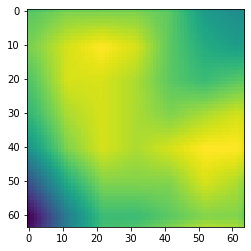

In [43]:
plt.clf()
plt.imshow(dr_out)
plt.show()

### xr_out

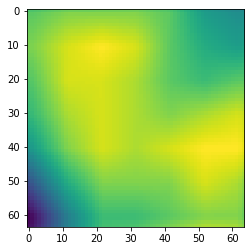

In [62]:
plt.clf()
plt.imshow(xr_out.Z500)
plt.show()

## Near lon=0

----

# Examine a few

In [91]:
def plot_sys(z500_images, seg_images, lbl, vmnx=None):
    
    # Start the plot
    fig = plt.figure(figsize=(12, 12))
    plt.clf()
    gs = gridspec.GridSpec(2, 2)

    for ss, image in enumerate([z500_image for z500_image in z500_images]+
                               [seg_image for seg_image in seg_images]):
    
        ax= plt.subplot(gs[ss])

        if ss <= 1:
            if vmnx is None:
                vmin, vmax = 4700, 5500
            else:
                vmin, vmax = vmnx
        else:
            vmin, vmax = None, None
        ax.imshow(image, vmin=vmin, vmax=vmax)

    # Layout and save
    plt.tight_layout(pad=0.5,h_pad=0.2,w_pad=0.3)
    #plt.savefig(outfile, dpi=400)
    plt.show()

## Load

In [67]:
ipath = '/data/Projects/Oceanography/AI/MHWS/'

In [69]:
images = np.load(os.path.join(ipath, 'MHW_sys_intermediate.npz'))

In [70]:
tbl = pandas.read_hdf(os.path.join(ipath, 'MHW_sys_intermediate.hdf'))

## Second one

In [71]:
images['z500'].shape

(64, 64, 4519)

In [78]:
np.min(z500_images[1])

4701

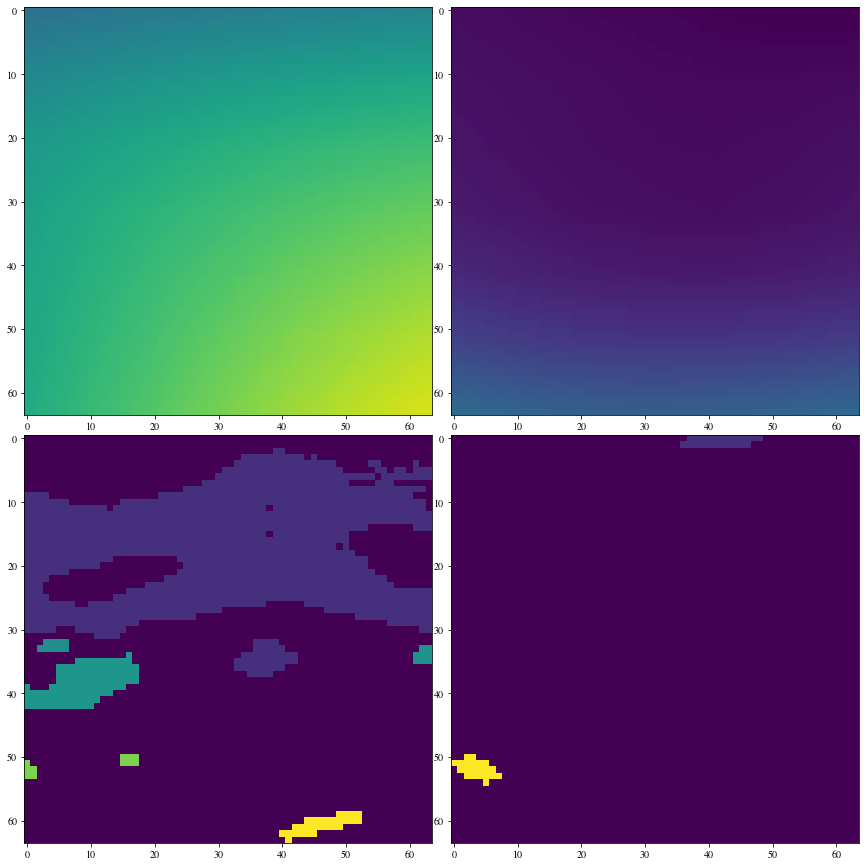

In [80]:
pidx = 1

z500_images = [images['z500'][...,pidx], images['z500_null'][...,pidx]]
seg_images = [images['images'][...,pidx], images['null'][...,pidx]]

plot_sys(z500_images, seg_images, None)

## Near the lon=0 boundary

In [82]:
np.argmin(tbl.lon)

933

In [84]:
tbl.iloc[933].lon

0.1484832763671875

In [89]:
np.min(z500_images[0])

5599

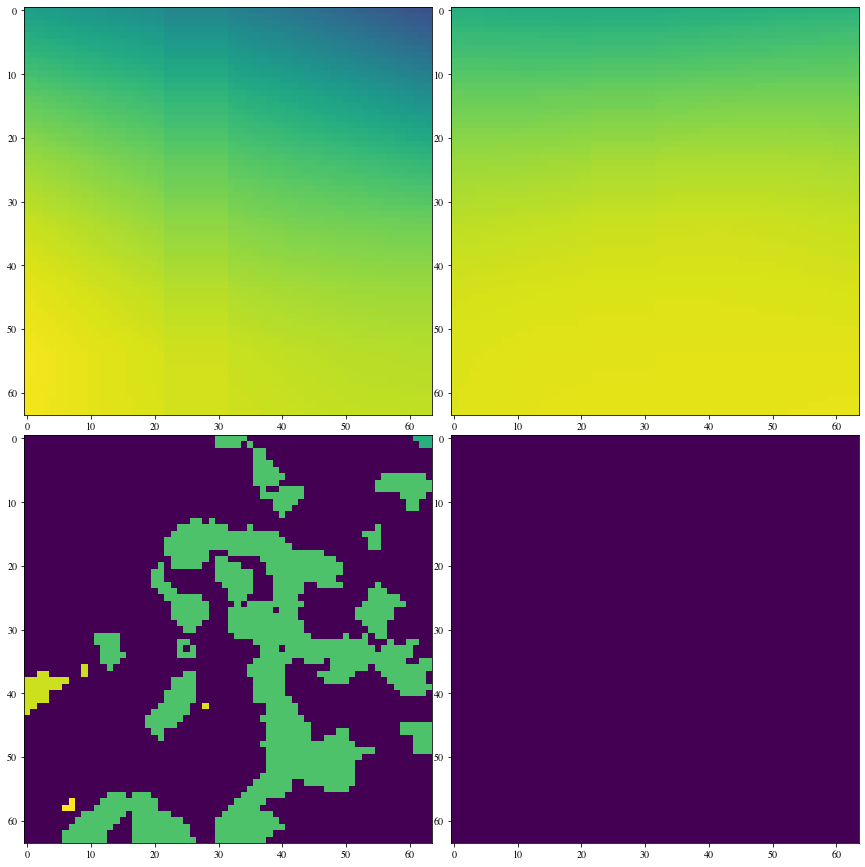

In [92]:
pidx = 933

z500_images = [images['z500'][...,pidx], images['z500_null'][...,pidx]]
seg_images = [images['images'][...,pidx], images['null'][...,pidx]]

plot_sys(z500_images, seg_images, None, vmnx=[5500, 5900])

----

# Z500 climate

## Test subtraction

In [94]:
ncep_path = os.getenv("NCEP_DOE")
climate_file = os.path.join(ncep_path, 'NCEP-DOE_Z500_climate.nc')
ncep_climate = xr.load_dataset(climate_file)

In [95]:
ncep_climate

<xarray.Dataset>
Dimensions:       (day: 366, lat: 73, lon: 144)
Coordinates:
  * day           (day) int64 0 1 2 3 4 5 6 7 ... 359 360 361 362 363 364 365
  * lat           (lat) float64 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon           (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    seasonalZ500  (day, lat, lon) float32 5070.3374 5070.3374 ... 5128.7104
    threshZ500    (day, lat, lon) float32 5232.625 5232.625 ... 5222.3936
Attributes:
    Conventions:  CF-1.7

In [96]:
ncep_ds = ncep_climate.sel(day=29)
ncep_ds

<xarray.Dataset>
Dimensions:       (lat: 73, lon: 144)
Coordinates:
    day           int64 29
  * lat           (lat) float64 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon           (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    seasonalZ500  (lat, lon) float32 5057.6396 5057.6396 ... 5095.9946 5095.9946
    threshZ500    (lat, lon) float32 5222.4453 5222.4453 ... 5187.4775 5187.4775
Attributes:
    Conventions:  CF-1.7

## Try it

In [98]:
ncep_2015_06_01 = ncep_io.load_z500((1,6,2015))

In [99]:
ncep_2015_06_01

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
    time     datetime64[ns] 2015-06-01
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    Z500     (lat, lon) float32 5583.0 5583.0 5583.0 ... 4883.0 4883.0 4883.0
Attributes:
    Conventions:  CF-1.7

### Before subtracting

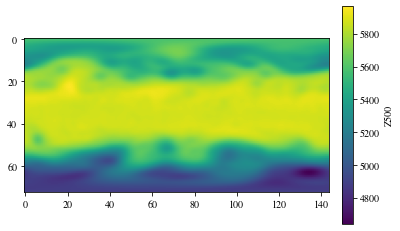

In [101]:
plt.clf()
mplt = plt.imshow(ncep_2015_06_01.Z500)
cb = plt.colorbar(mplt, fraction=0.050, pad=0.04)
cb.set_label('Z500')
plt.show()

### Subtract me

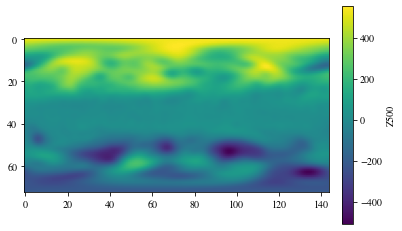

In [102]:
plt.clf()
mplt = plt.imshow(ncep_2015_06_01.Z500 - ncep_ds.seasonalZ500)
cb = plt.colorbar(mplt, fraction=0.050, pad=0.04)
cb.set_label('Z500')
plt.show()

### Climate only

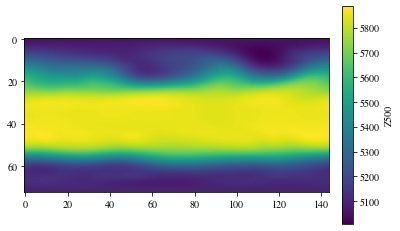

In [103]:
plt.clf()
mplt = plt.imshow(ncep_ds.seasonalZ500)
cb = plt.colorbar(mplt, fraction=0.050, pad=0.04)
cb.set_label('Z500')
plt.show()

----

# Tests

## xarray

In [49]:
tmp = np.zeros((720,1440,10))

In [57]:
times = pandas.date_range(start=idate, periods=10)